# Solution of N Queens with Genetic Algorithms

In [66]:
from random import shuffle, randint,sample,choices, random 
import matplotlib.pyplot as plt
from typing import List
from numpy import mean

When creating a proposal for a solution our algorithm place one queen per column. Since the number of columns is equal to the number of queens, this makes any conflicts by queens in the same column impossible. Since the solution is based on a vector of size n with no numbers appearing more than once, this eliminates the chances of conflicts by queens in the same row as well. The only conflicts possible will occur diagonally.This choice reduces the computational time of execution by reducing the search space of the algorithm.

In [67]:

def create_solution(n:int)->List:
    """Generate a random permutation of size n that represents a solution."""
    sol : List =  list(range(n))
    shuffle(sol)
    return sol


Select a random point and separate the parents in two then append the generating two new potential solutions.

In [68]:

def crossover(parent_1, parent_2):
    """Perform one-point crossover to create two offsprings."""
    n = len(parent_1)
    ref_point = randint(1, n-1)
    child_1 = parent_1[:ref_point] + [x for x in parent_2 if x not in parent_1[:ref_point]]
    child_2 = parent_2[:ref_point] + [x for x in parent_1 if x not in parent_2[:ref_point]]
    return child_1, child_2


When mutating a possible solution we swap the row position of two queens, this gives us the vfariation necessary without opening the chance of same row conflicts.

In [69]:

def mutate(sol) -> None:
    """Apply mutation to a solution"""
    i, j = sample(range(len(sol)), 2)
    sol[i], sol[j] = sol[j], sol[i]


Our fitness function checks if two queens threaten each other. it does that by checking if they are in the same diagonal.  A know charsteristic pieces in a chessboard is that if the difference in their column positions (i - j) is equal to the difference in their row positions (sol[i] - sol[j]), they are in the same diagonal, evaluating this property for all the queens we can have the total number of conflicts of a specific solution.

In [70]:

def fitness(sol : List) -> int:
    """Calculate the fitness of a solution (number of queen conflicts)."""
    conflicts = 0
    n = len(sol)
    for i in range(n):
        for j in range(i+1, n):
            if abs(i - j) == abs(sol[i] - sol[j]):
                conflicts += 1
    return conflicts

Plots the best, mean and worst solution found in every generation of the individuals.

In [71]:
def metrics(best_solutions : List, worst_solutions : List, mean_fitness: List)->None:
    """Plot the development of worst, mean and best solutions per generation"""
    x = range(len(best_solutions))
    plt.plot(x, best_solutions, label='Best Solution')
    plt.plot(x, worst_solutions, label='Worst Solution')
    plt.plot(x, mean_fitness, label = 'Mean Solution')
    plt.xlabel('Generation')
    plt.ylabel('Fitness (Number of Conflicts)')
    plt.legend()
    plt.title('Genetic Algorithm for N-Queens')
    plt.show()

In [72]:

def genetic_algorithm(n: int, pop_size: int, mutation_rate: float, max_generations: int, crossover_rate : float = 1) -> List[int]:
    best_solutions : List = []  # To store the best solution per generation
    worst_solutions : List = []  # To store the worst solution per generation
    mean_fitness : List = [] # To store the mean fitness per generation
    pop = [create_solution(n) for _ in range(pop_size)]

    for _ in range(max_generations):
        # Order population by fitness quality.
        pop = sorted(pop, key=lambda x: fitness(x))
        generation_mean : float = mean([fitness(x) for x in pop])
        best_solution = pop[0]
        # Save historic data of best, mean and worst solutions per generation.
        best_solutions.append(fitness(pop[0]))
        worst_solutions.append(fitness(pop[-1]))
        mean_fitness.append(generation_mean)
        # Check if the best solution of the current generation is optimal.
        if fitness(best_solution) == 0:
            break
        new_pop : List = pop
        for _ in range(pop_size // 2):
            options = choices(range(len(pop)-2), k=2)
            options = sorted(options)[:2]
            # Select a pair of solutions for reproduction:
            parent1 = pop[options[0]]
            parent2 = pop[options[1]]
            #  Crossover the pair if conditions are met
            if random() < crossover_rate:
                child1, child2 = crossover(parent1, parent2)
                # Mutate offsprings if conditions are met
                if random() > mutation_rate:
                    mutate(child1)
                if random() < mutation_rate:
                    mutate(child2)
            new_pop.extend([child1, child2])
        pop = new_pop[:-2]
    # Plot the best, mean and  worst solution per generation.
    metrics(best_solutions, worst_solutions,mean_fitness)
    print("Total generations : ", len(best_solutions))
    return best_solution  # Return the best solution found

This function print a chess table with the queens positioned for vizualization. 

In [73]:

def print_board(sol : List):
    n = len(sol)
    for row in range(n):
        line = ""
        for col in range(n):
            if sol[col] == row:
                line += "Q "
            else:
                line += ". "
        print(line)


## General parameters for execution

In [74]:
population_size = 100
mutation_rate = 0.8
max_generations = 10000

## Solution for n = 8

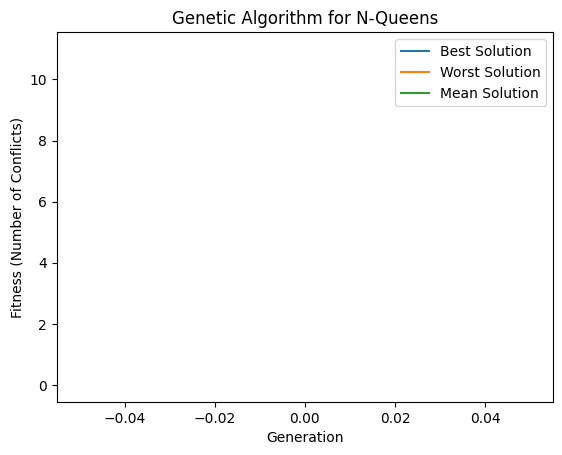

Total generations :  1
Best solution: [4, 6, 0, 3, 1, 7, 5, 2]
Fitness: 0
. . Q . . . . . 
. . . . Q . . . 
. . . . . . . Q 
. . . Q . . . . 
Q . . . . . . . 
. . . . . . Q . 
. Q . . . . . . 
. . . . . Q . . 


In [75]:
n = 8
best_solution = genetic_algorithm(n, population_size, mutation_rate, max_generations)
# Print the best solution found
print("Best solution:", best_solution)
print('Fitness:',fitness(best_solution))
print_board(best_solution)

## Solution for n = 20

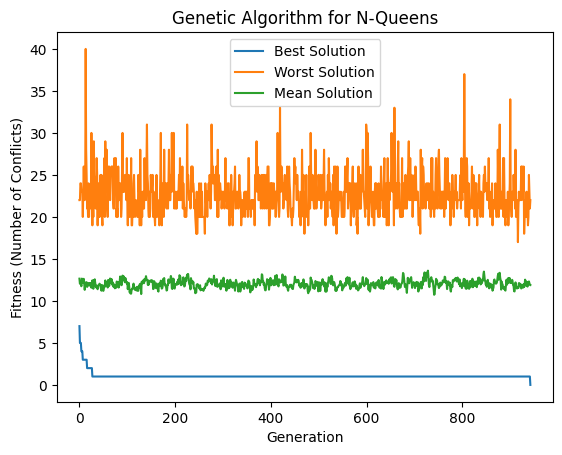

Total generations :  943
Best solution: [17, 13, 7, 9, 2, 14, 16, 1, 8, 6, 0, 19, 15, 5, 18, 10, 12, 3, 11, 4]
Fitness: 0
. . . . . . . . . . Q . . . . . . . . . 
. . . . . . . Q . . . . . . . . . . . . 
. . . . Q . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . Q . . 
. . . . . . . . . . . . . . . . . . . Q 
. . . . . . . . . . . . . Q . . . . . . 
. . . . . . . . . Q . . . . . . . . . . 
. . Q . . . . . . . . . . . . . . . . . 
. . . . . . . . Q . . . . . . . . . . . 
. . . Q . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . Q . . . . 
. . . . . . . . . . . . . . . . . . Q . 
. . . . . . . . . . . . . . . . Q . . . 
. Q . . . . . . . . . . . . . . . . . . 
. . . . . Q . . . . . . . . . . . . . . 
. . . . . . . . . . . . Q . . . . . . . 
. . . . . . Q . . . . . . . . . . . . . 
Q . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . Q . . . . . 
. . . . . . . . . . . Q . . . . . . . . 


In [76]:
n = 20
best_solution = genetic_algorithm(n, population_size, mutation_rate, max_generations)
# Print the best solution found
print("Best solution:", best_solution)
print('Fitness:',fitness(best_solution))
print_board(best_solution)

## Solution for n = 50

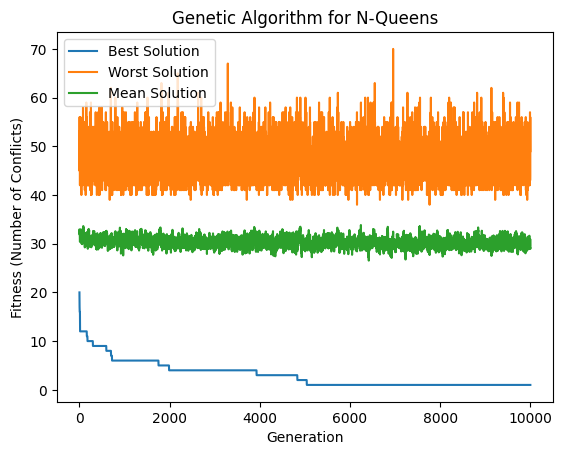

Total generations :  10000
Best solution: [17, 12, 32, 16, 33, 24, 14, 38, 4, 48, 26, 43, 3, 27, 15, 37, 44, 10, 0, 5, 19, 11, 28, 20, 39, 13, 18, 34, 40, 49, 35, 31, 42, 9, 36, 6, 30, 46, 21, 7, 29, 45, 22, 8, 47, 2, 41, 1, 25, 23]
Fitness: 1
. . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . 
. . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . .

In [77]:
n = 50
best_solution = genetic_algorithm(n, population_size, mutation_rate, max_generations)
# Print the best solution found
print("Best solution:", best_solution)
print('Fitness:',fitness(best_solution))
print_board(best_solution)
